In [1]:
import pandas as pd
df = pd.read_csv('Reviews.csv')
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,100,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
1,101,B004K2IHUO,A1SYSKR79LA2CB,"Mycroft ""Virture is its own punishment""",4,5,5,1233014400,Taste wise it is a 6 star item,"The mouth says, ""How do I love thee, let me co..."
2,102,B004K2IHUO,A3D1TXE98KRKYO,"Danny ""The Student""",2,3,4,1256515200,Great Support,Arrived slightly thawed. My parents wouldn't a...
3,103,B004K2IHUO,AVCA516CFZ9HF,S. Fowler,0,0,4,1335139200,TART!,The crust on these tarts are perfect. My husb...
4,104,B004K2IHUO,A1P21J0DMTVGS7,Lovethemovies,0,0,5,1332028800,Omaha Apple Tartlets,These are absolutely scrumptuous! My husband ...


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
fig = px.histogram(df, x="Score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()


NameError: name 'df' is not defined

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olete\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


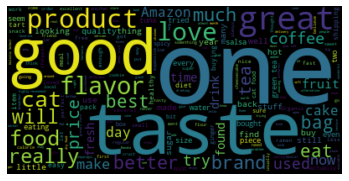

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS	
stopwords = STOPWORDS
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('picturetxt.png')
plt.show()


In [4]:
df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,100,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,-1
1,101,B004K2IHUO,A1SYSKR79LA2CB,"Mycroft ""Virture is its own punishment""",4,5,5,1233014400,Taste wise it is a 6 star item,"The mouth says, ""How do I love thee, let me co...",1
2,102,B004K2IHUO,A3D1TXE98KRKYO,"Danny ""The Student""",2,3,4,1256515200,Great Support,Arrived slightly thawed. My parents wouldn't a...,1
3,103,B004K2IHUO,AVCA516CFZ9HF,S. Fowler,0,0,4,1335139200,TART!,The crust on these tarts are perfect. My husb...,1
4,104,B004K2IHUO,A1P21J0DMTVGS7,Lovethemovies,0,0,5,1332028800,Omaha Apple Tartlets,These are absolutely scrumptuous! My husband ...,1


In [5]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]


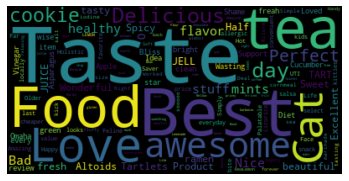

In [6]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"]) 
pos = ",".join(review for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()


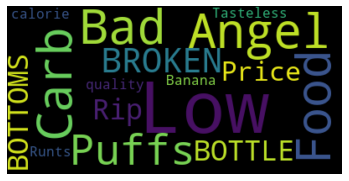

In [7]:
stopwords = set(STOPWORDS)
neg = ','.join([str(review) for review in negative.Summary])
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloudneg.png')
plt.show()


In [8]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()


In [10]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)


In [11]:
dfNew = df[['Summary','sentiment']]
dfNew.head()


,Summary,sentiment
0,Bad,-1
1,Taste wise it is a 6 star item,1
2,Great Support,1
3,TART,1
4,Omaha Apple Tartlets,1


In [12]:
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])


In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [15]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']


In [16]:
lr.fit(X_train,y_train)

LogisticRegression()

In [17]:
predictions = lr.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)


array([[ 0,  0],
       [ 1, 12]], dtype=int64)

In [19]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        13

    accuracy                           0.92        13
   macro avg       0.50      0.46      0.48        13
weighted avg       1.00      0.92      0.96        13



C:\Users\olete\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\olete\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\olete\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

